# EDA on ADANIPORTS
 The data spans from 1st January, 2000 to 30th April, 2021.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/nifty50-stock-market-data/versions/15


**Date:** The trading date for the stock data.

**Symbol:**	This column might contain the stock ticker symbol.

**Series:**	This column should refer to the type of stock: EQ (Equity), BE (Bonus Equity) etc.

**Prev Close:**	The closing price of the stock on the previous trading day.

**Open:**	The opening price of the stock on the current trading day.

**High:**	The highest price the stock reached during the current trading day.

**Low:**	The lowest price the stock reached during the current trading day.

**Last:**	The last traded price of the stock on the current trading day.

**Close:**	The closing price of the stock on the current trading day.

**VWAP:**	The Volume Weighted Average Price of the stock for the current trading day.

*   VWAP= ∑(Price×Volume)/∑Volume



**Volume:**	The total number of shares traded on the current trading day.

**Turnover:**	The total value of shares traded on the current trading day (usually in a local currency).

**Trades:**	The total number of trades executed for the stock on the current trading day.

**Deliverable Volume:**	The volume of shares that were actually delivered to buyers on the current trading day.

**%Deliverble:**	The percentage of the total traded volume that was delivered.

*   %Deliverable= (Deliverable Volume/Total Volume) ×100



In [ ]:
import pandas as pd
df = pd.read_csv(path+"/ADANIPORTS.csv",index_col='Date',parse_dates=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


## Data Preprocessing

In [ ]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
df.shape

(3322, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [ ]:
df.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


There are 866 NULL values, we have t

In [ ]:
if df['Trades'].isnull().sum() > 0:
    df['Trades'] = df['Trades'].fillna(df['Trades'].median())

In [ ]:
df.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [ ]:
df.duplicated().sum()

0

 Adding additional columns

In [ ]:
df['Daily Change'] = df['Close'] - df['Open']
df['Daily Change %'] = ((df['Close'] - df['Open']) / df['Open']) * 100

In [ ]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Change,Daily Change %
Date,,,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,35881.5,9859619,0.3612,192.90,25.051948
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,35881.5,1453278,0.3172,-90.10,-9.156504
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,35881.5,1069678,0.2088,-24.80,-2.728273
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,35881.5,1260913,0.2735,31.55,3.544944
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,35881.5,816123,0.2741,29.55,3.144453


## EDA

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Change,Daily Change %
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3322.000000,3322.000000,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.256570e+04,1.207441e+06,0.445899,-0.561394,-0.102387
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,4.337026e+04,1.398640e+06,0.160496,12.439673,2.698294
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000,-169.950000,-17.765658
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.643650e+04,3.212005e+05,0.332900,-4.287500,-1.494438
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650,-0.500000,-0.192978
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,4.585475e+04,1.605528e+06,0.555850,3.250000,1.148864
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800,192.900000,25.051948


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data distribution of numerical columns only

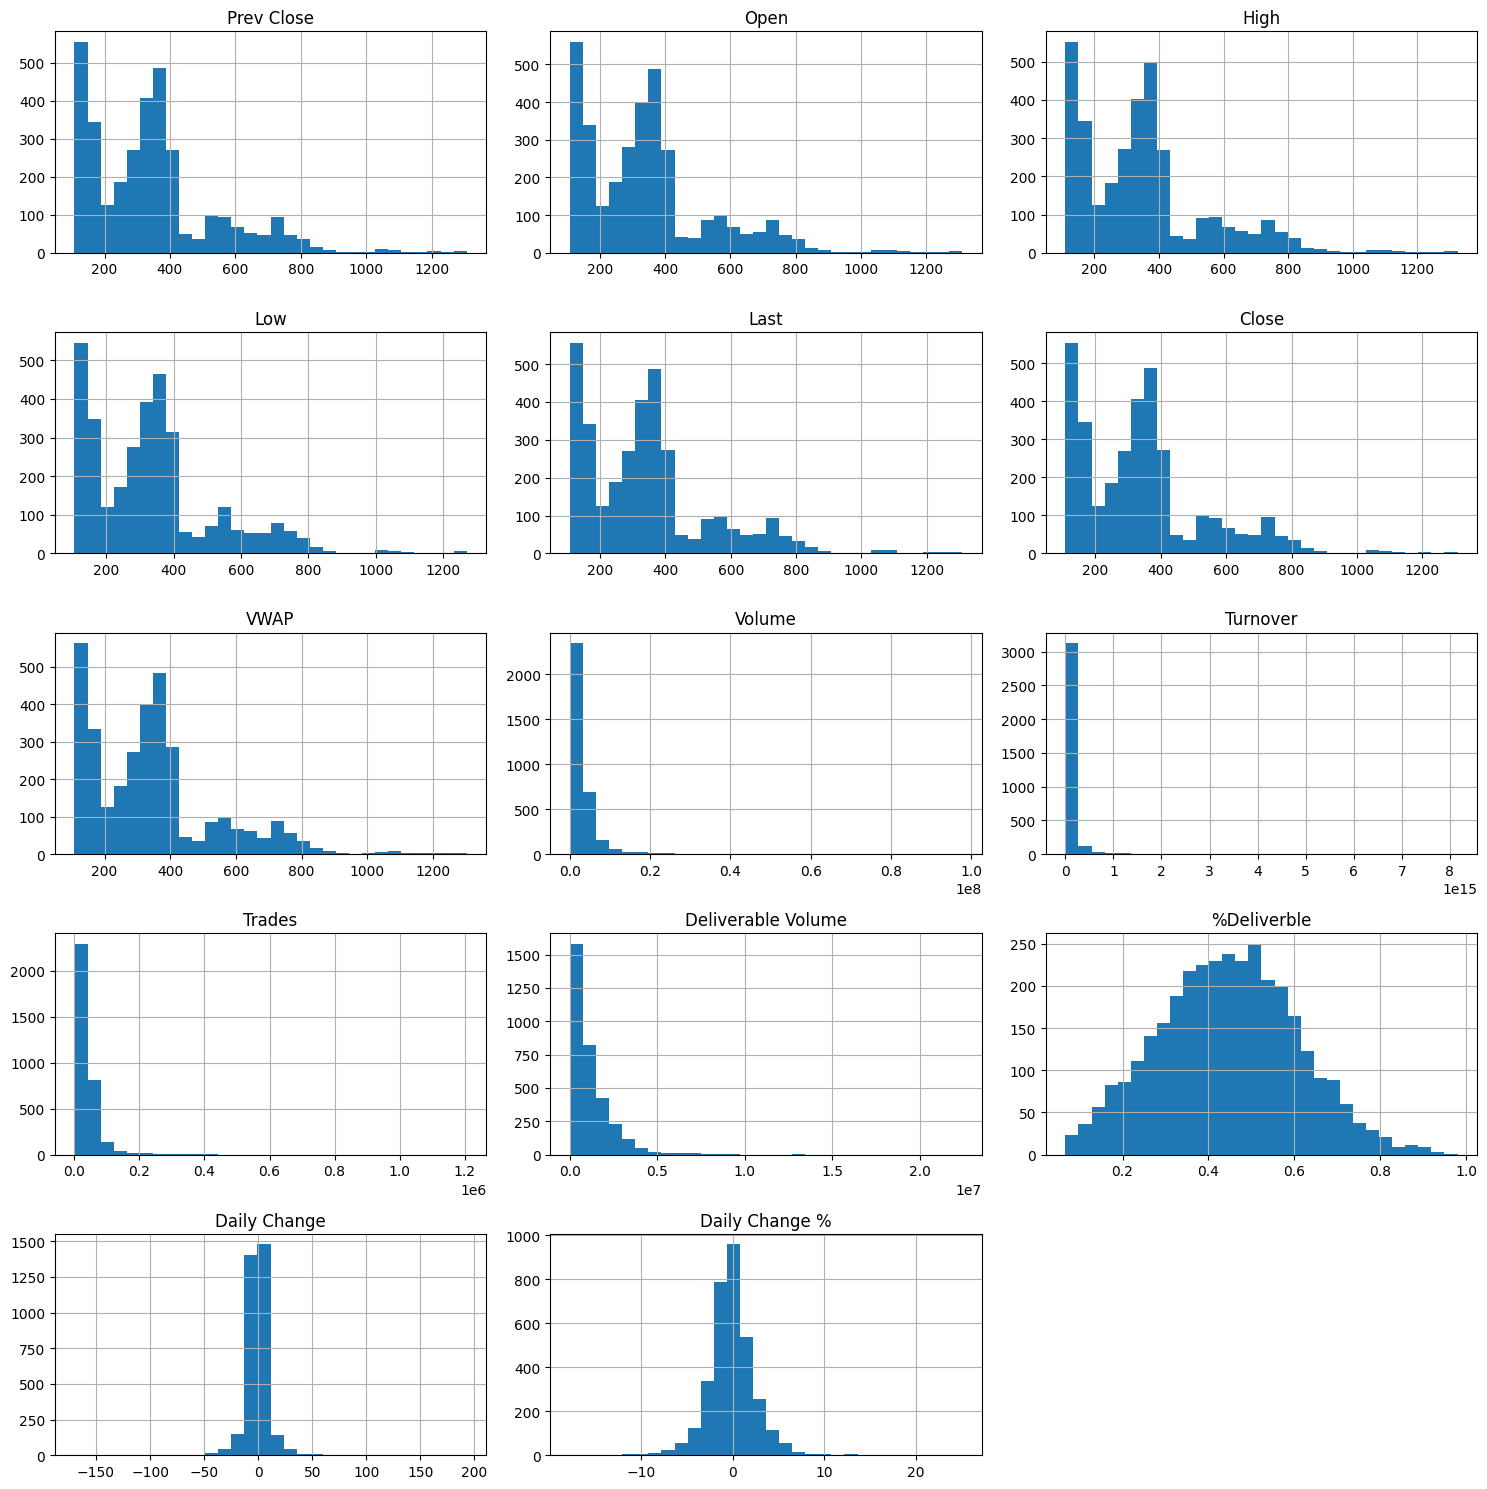

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
#histogram
df[numeric_cols].hist(bins=30, figsize=(15, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

 Volume and Close Price Trends Over Time

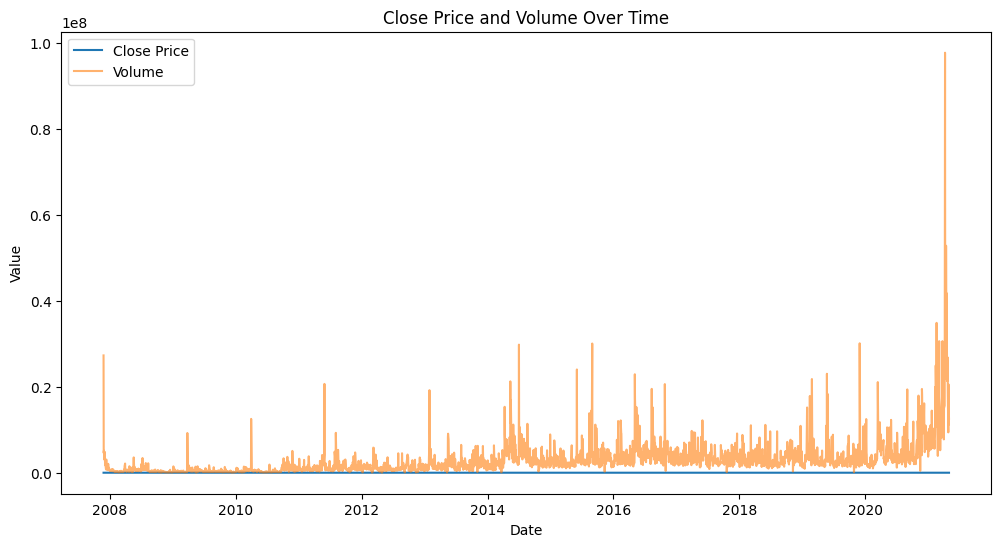

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Volume'], label='Volume', alpha=0.6)
plt.legend()
plt.title('Close Price and Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

Daily Price Change Distribution

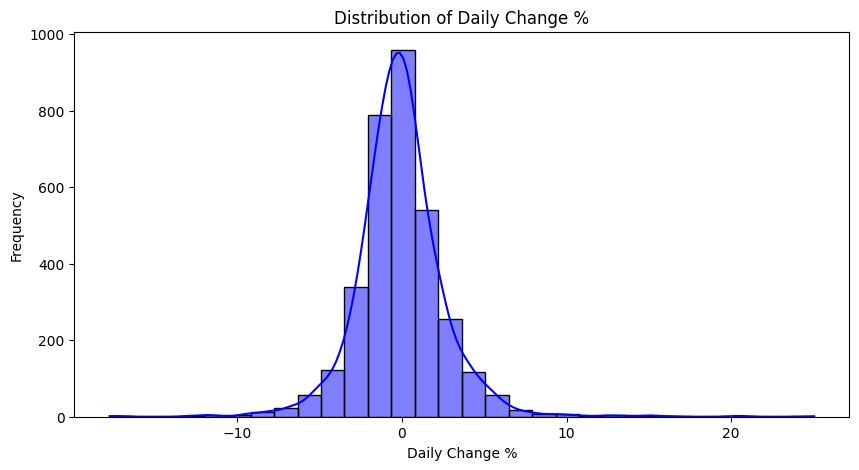

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Change %'], bins=30, kde=True, color='blue')
plt.title('Distribution of Daily Change %')
plt.xlabel('Daily Change %')
plt.ylabel('Frequency')
plt.show()

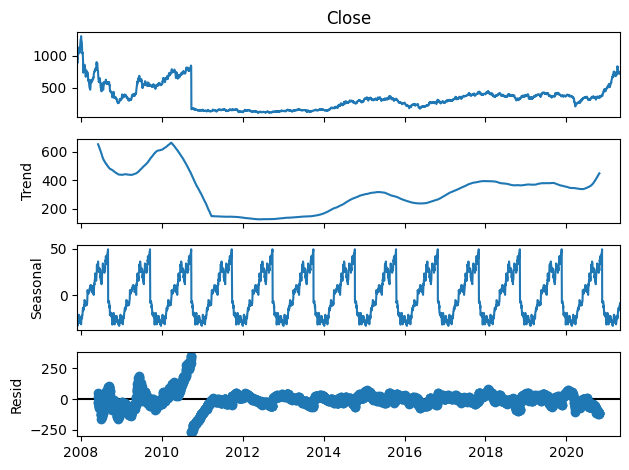

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming yearly seasonality (252 trading days)
result.plot()
plt.show()

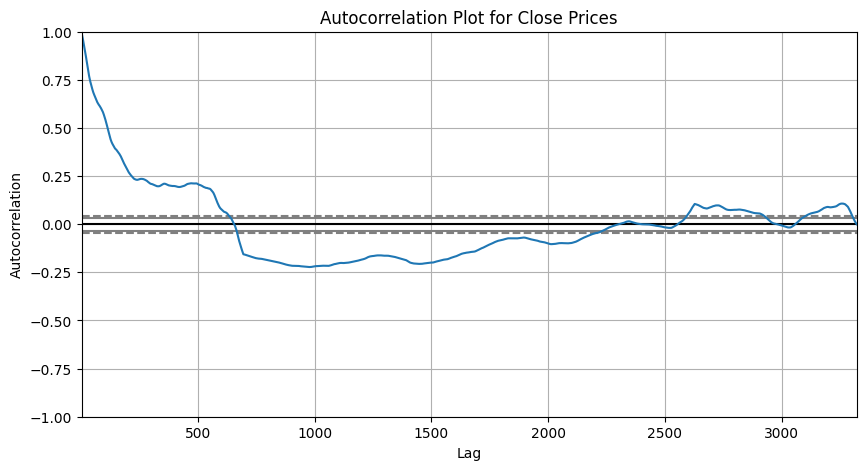

In [ ]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot for Close Prices')
plt.show()

In [ ]:
# Create Lagged Features
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_2'] = df['Close'].shift(2)

# Display head of updated DataFrame
df[['Close', 'Close_Lag_1', 'Close_Lag_2']].head()


,Close,Close_Lag_1,Close_Lag_2
Date,,,
2007-11-27,962.90,NaN,NaN
2007-11-28,893.90,962.90,NaN
2007-11-29,884.20,893.90,962.9
2007-11-30,921.55,884.20,893.9
2007-12-03,969.30,921.55,884.2


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -3.4730976831334264
p-value: 0.008705487700678907


close is stationary


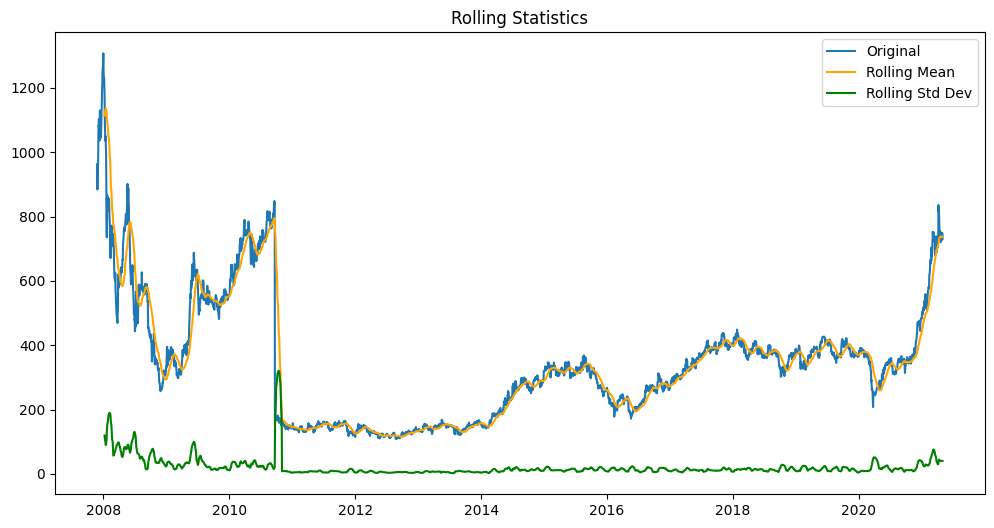

In [ ]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Statistics')
plt.legend()
plt.show()

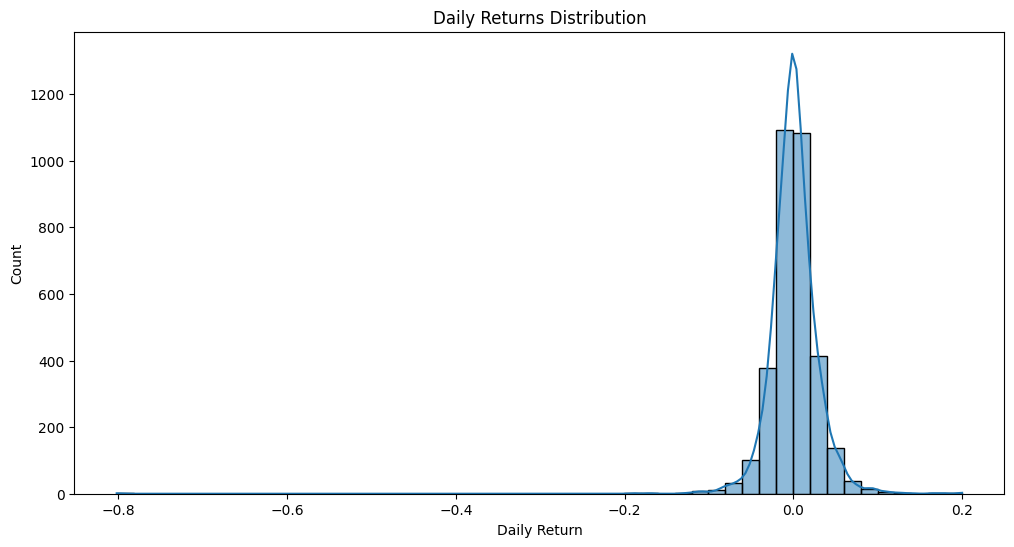

In [ ]:
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50)
plt.title('Daily Returns Distribution')
plt.show()

In [ ]:
important_cols = ['Close', 'Volume', 'VWAP']
df_important = df[important_cols]

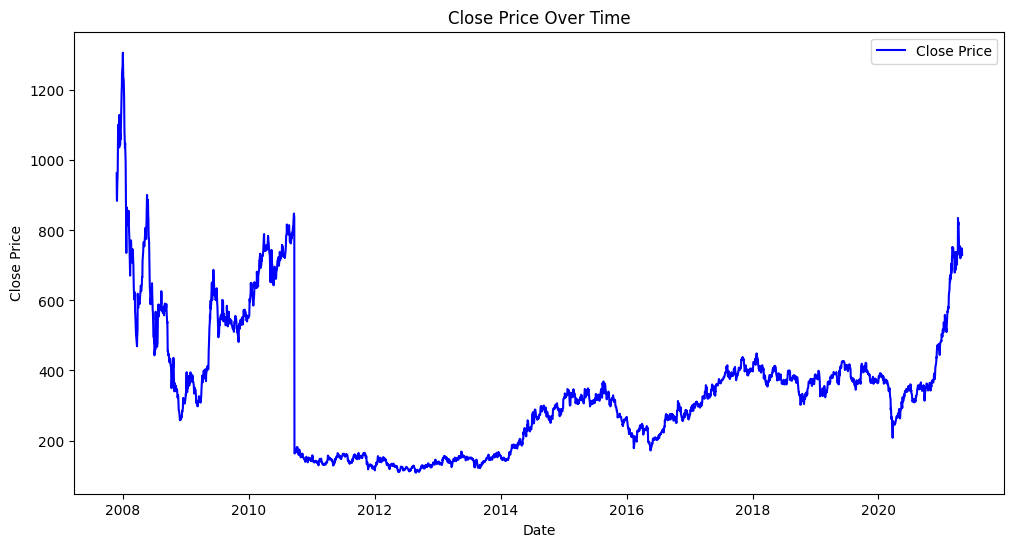

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_important['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

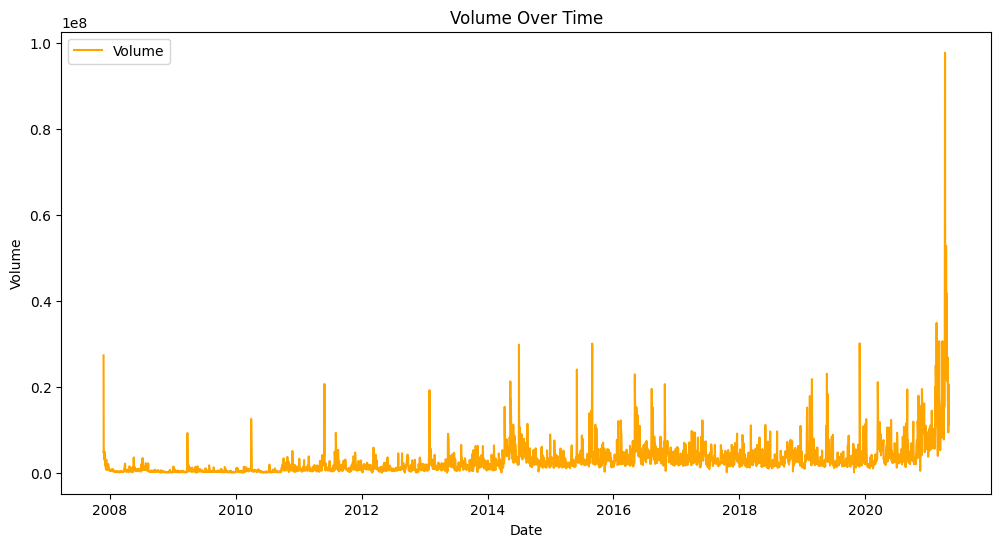

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_important['Volume'], label='Volume', color='orange')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

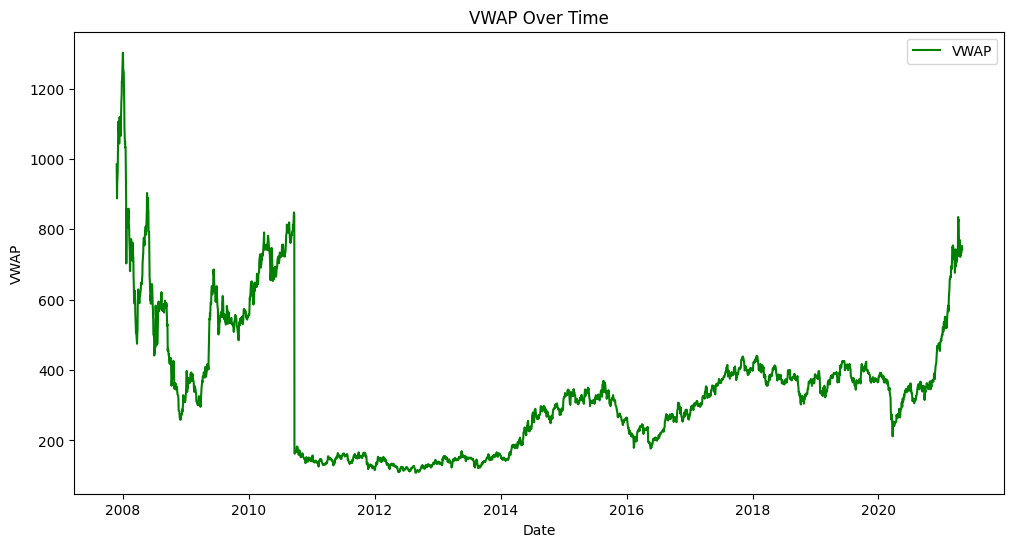

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_important['VWAP'], label='VWAP', color='green')
plt.title('VWAP Over Time')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.show()

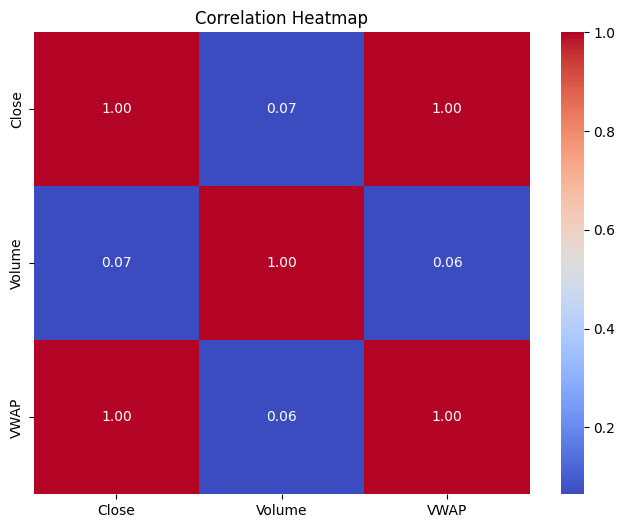

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_important.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Univariate Analysis

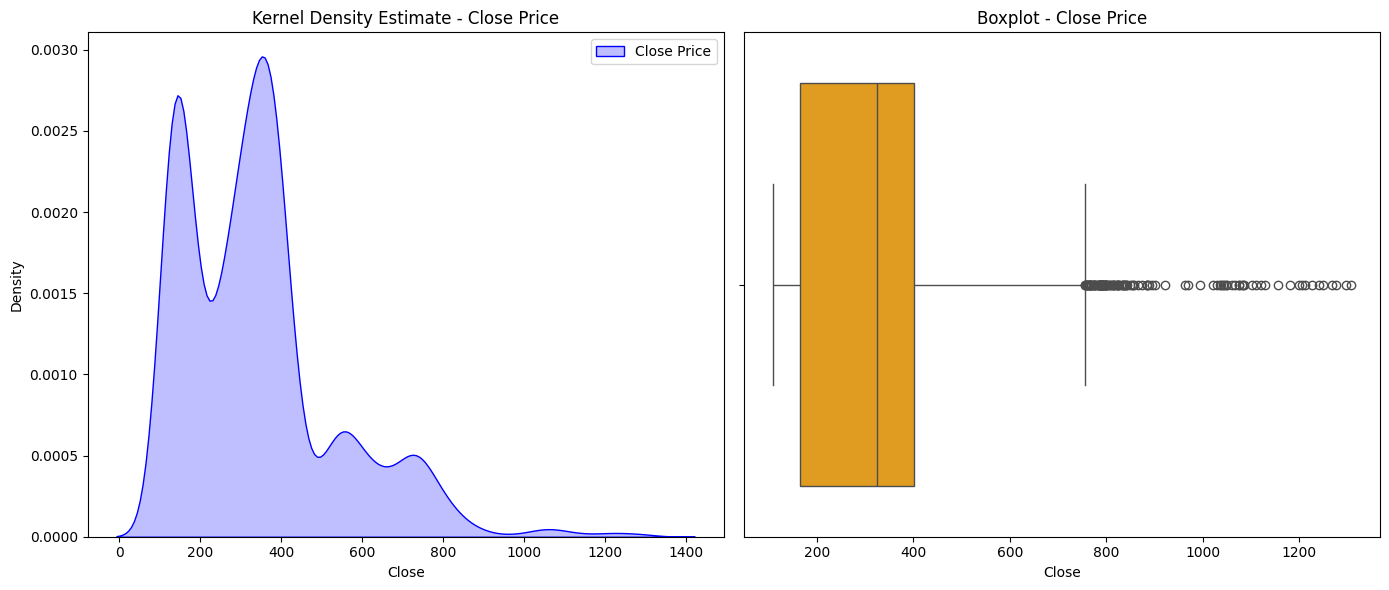

In [ ]:
#for 'Close' Prices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # KDE Plot
sns.kdeplot(df['Close'], fill=True, color='blue', label='Close Price')
plt.title('Kernel Density Estimate - Close Price')
plt.legend()

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Close'], color='orange')
plt.title('Boxplot - Close Price')

plt.tight_layout()
plt.show()


### Bivariate Correlation Heatmap

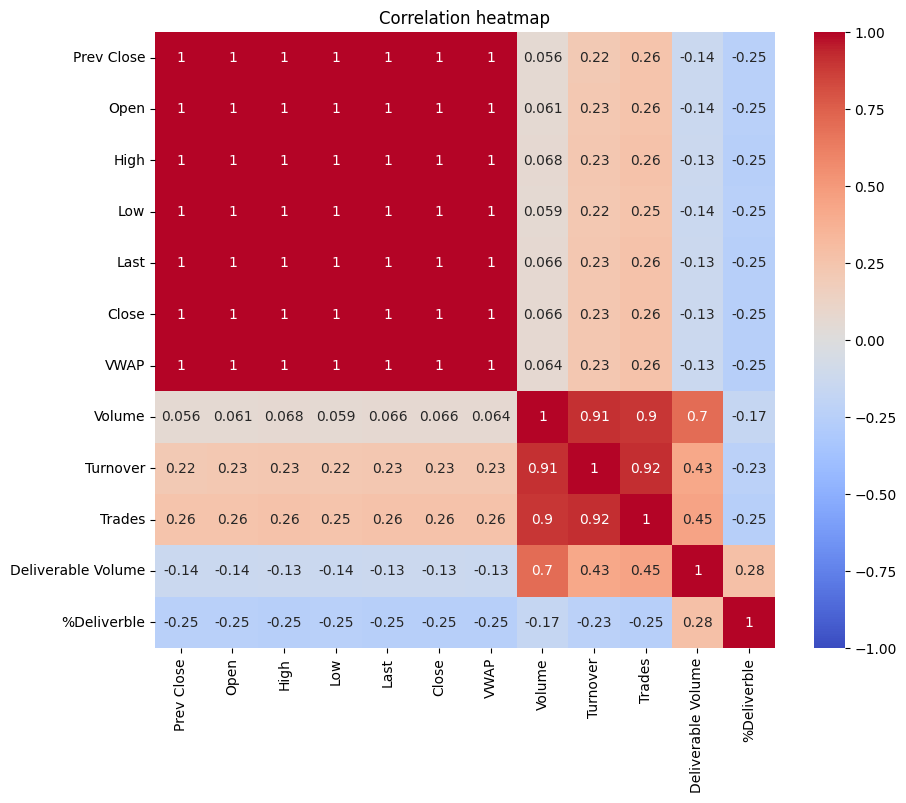

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

Multivariate Analysis Using Pairplot

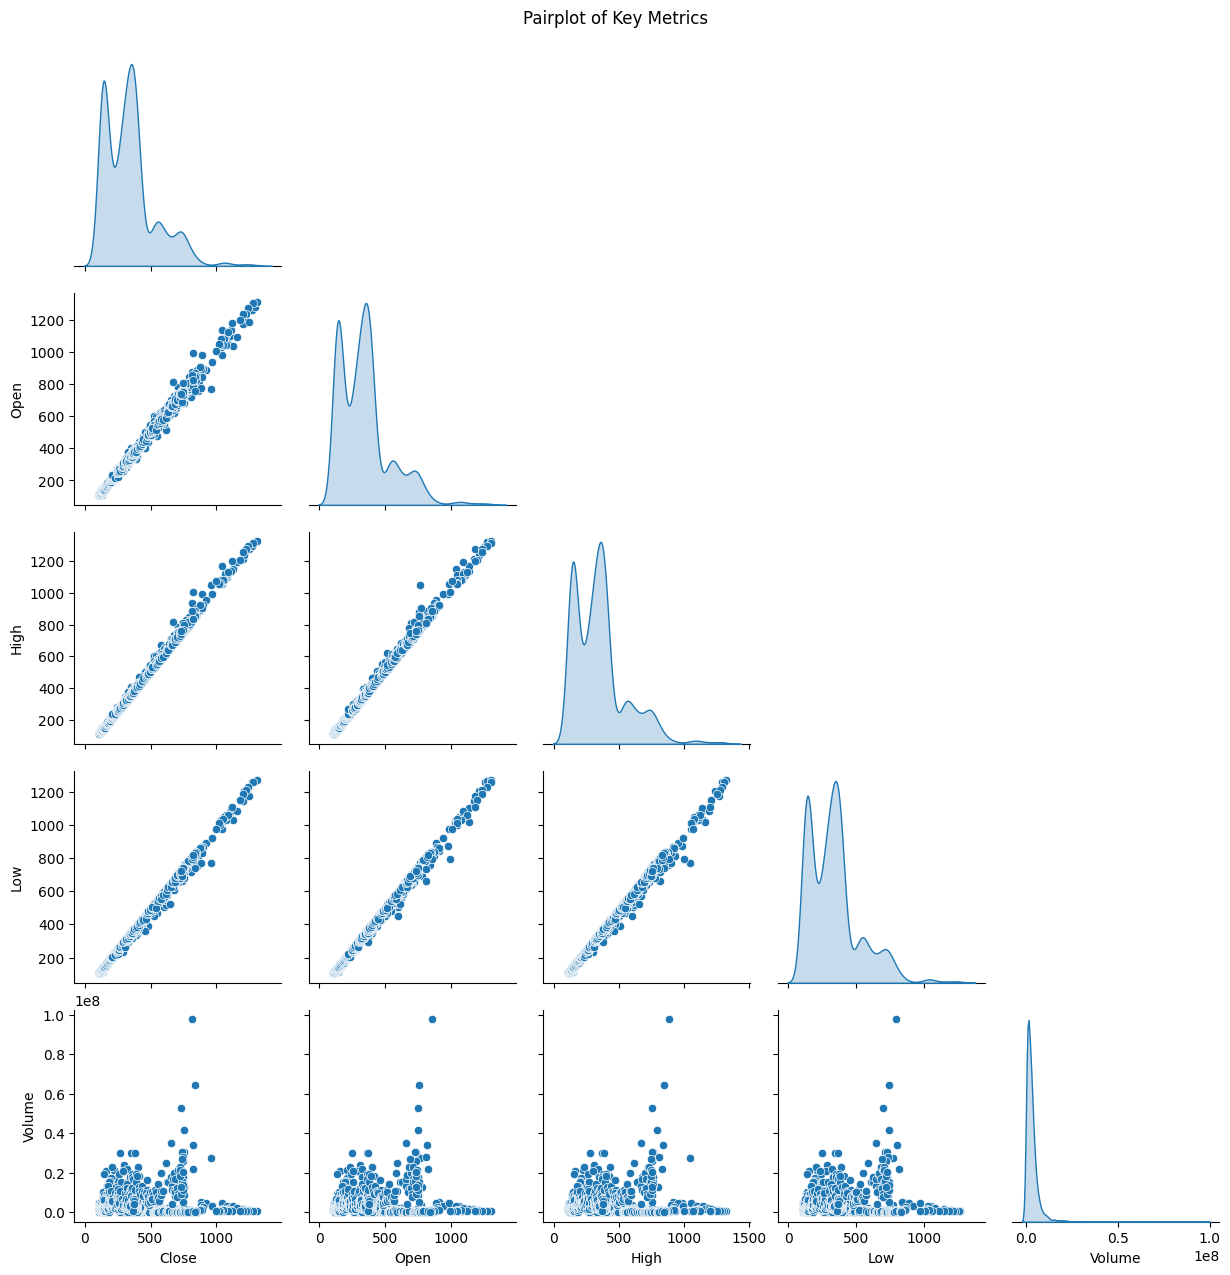

In [ ]:
# Pairplot for Key Columns
sns.pairplot(df[['Close', 'Open', 'High', 'Low', 'Volume']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Metrics', y=1.02)
plt.show()


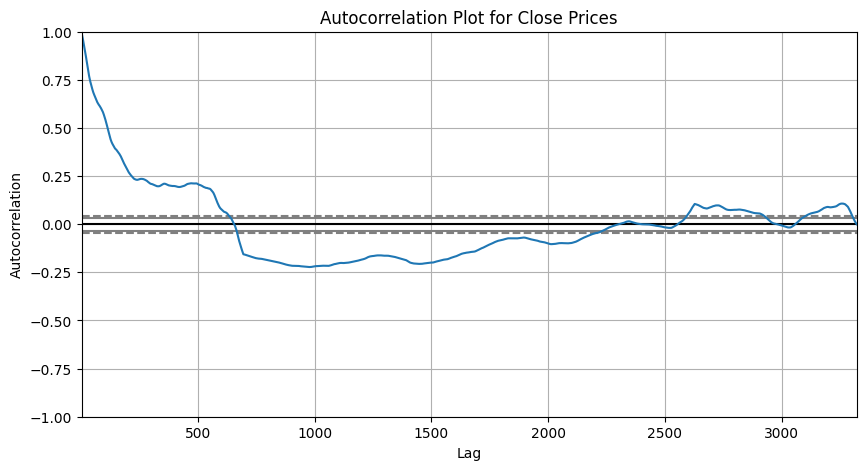

In [ ]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation for 'Close' Prices
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot for Close Prices')
plt.show()

Extracting some important insights

In [ ]:
# Identify highest and lowest turnover
max_turnover = df['Turnover'].max()
min_turnover = df['Turnover'].min()

print(f"Highest turnover of the company = {max_turnover}")
print(f"Lowest turnover of the company = {min_turnover}")

Highest turnover of the company = 8160988307835002.0
Lowest turnover of the company = 241585705000.0


Trading days distribution by weekday:
DayOfWeek
Wednesday    669
Tuesday      668
Thursday     659
Monday       659
Friday       653
Saturday      11
Sunday         3
Name: count, dtype: int64


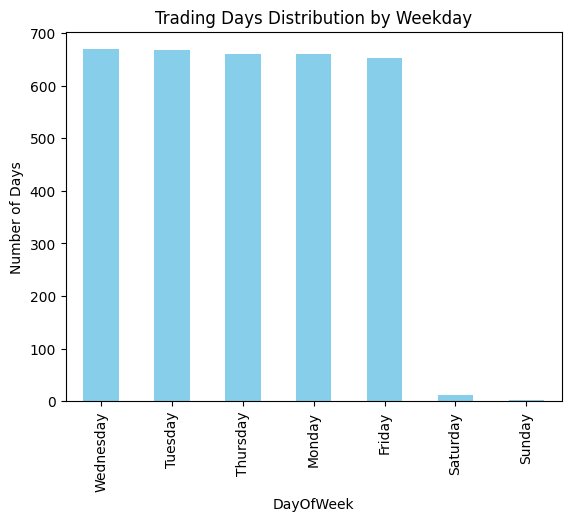

In [ ]:
# Add a day of the week column
df['DayOfWeek'] = df.index.day_name()

# Count trading days per weekday
weekday_counts = df['DayOfWeek'].value_counts()

# Identify no or low trading days
print("Trading days distribution by weekday:")
print(weekday_counts)

weekday_counts.plot(kind='bar', title='Trading Days Distribution by Weekday', color='skyblue')
plt.ylabel('Number of Days')
plt.show()


Most trading month based on frequency:
Month
January      300
December     294
July         288
March        286
February     278
May          276
June         276
August       270
April        265
September    265
November     263
October      261
Name: count, dtype: int64
Trading Volume by Year:
Year
2007      73495671
2008     124436089
2009     103770017
2010     166019107
2011     345344234
2012     313582875
2013     512936772
2014     914011177
2015     819423363
2016    1185652404
2017     918616034
2018     827556069
2019     920558313
2020    1293588967
2021    1296070256
Name: Volume, dtype: int64


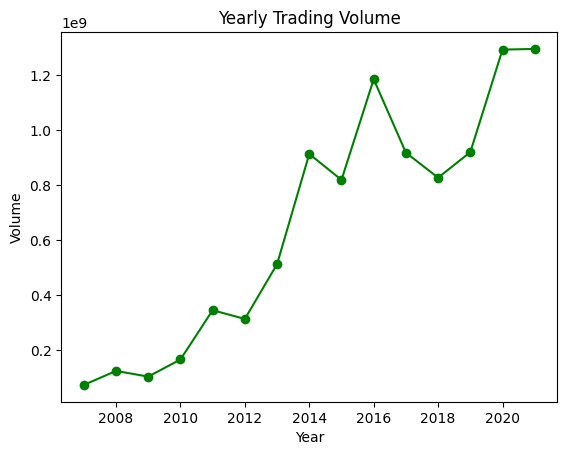

In [ ]:
#year and month from the index
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

most_trading_month = df['Month'].value_counts()# Monthly trading distribution

print("Most trading month based on frequency:")
print(most_trading_month)

yearly_trades = df.groupby('Year')['Volume'].sum()# Yearly trading trend

print("Trading Volume by Year:")
print(yearly_trades)

yearly_trades.plot(kind='line', marker='o', title='Yearly Trading Volume', color='green')# Yearly Trends
plt.ylabel('Volume')
plt.show()


Average Volume by Year:
Year
2007    3.195464e+06
2008    5.058378e+05
2009    4.270371e+05
2010    6.588060e+05
2011    1.398155e+06
2012    1.249334e+06
2013    2.051747e+06
2014    3.745947e+06
2015    3.304126e+06
2016    4.800212e+06
2017    3.704097e+06
2018    3.364049e+06
2019    3.757381e+06
2020    5.133290e+06
2021    1.620088e+07
Name: Volume, dtype: float64


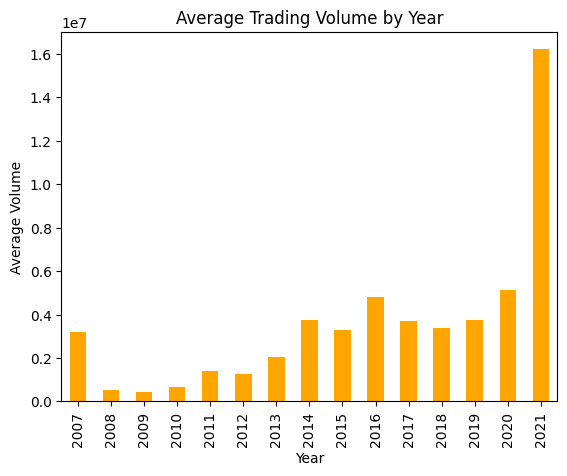

In [ ]:
# Group by year and calculating average volume
yearly_avg_volume = df.groupby('Year')['Volume'].mean()

print("Average Volume by Year:")
print(yearly_avg_volume)

yearly_avg_volume.plot(kind='bar', title='Average Trading Volume by Year', color='orange')
plt.ylabel('Average Volume')
plt.show()


In [ ]:
# Group by Month and calculate total volume
monthly_volume = df.groupby('Month')['Volume'].sum().sort_values(ascending=False)

print("Monthly Total Volume:")
print(monthly_volume)

most_active_month = monthly_volume.idxmax()
print(f"The most active month for volume is {most_active_month}.")


Monthly Total Volume:
Month
April        1136269579
May           995443688
March         979236655
February      861909805
November      832061586
January       789700896
August        784249190
December      762376360
June          700963012
July          681501345
October       657813006
September     633536226
Name: Volume, dtype: int64
The most active month for volume is April.


# **Conclusion**
**Trading Patterns:**
*   Most trading occurs Monday to Friday, with minimal or no trading on weekends.April is the most active trading month.
*   Trading activity has steadily increased over the years, with 2021 being the most active year.

**Turnover and Volume:**
*   Highest turnover: 1,205,984.0
*   Lowest turnover: 366.0

*   Trading volume peaked in 2007, declined, and began a consistent rise from 2012 onward.
*   April stands out as the most significant month for trading volumes.

**Trends and Insights:**
*   The stock exhibits yearly seasonality and strong autocorrelation, indicating potential predictability.
*   Stationary behavior in the 'Close' price and near-normal distribution of returns highlight modeling opportunities.



# Data Preparation : Stationarity Check

In [ ]:
# Stationarity Check using ADF Test
def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop missing values for ADF
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Example: Check stationarity of 'Close' prices
check_stationarity(df['Close'])

# If not stationary, apply differencing
if adfuller(df['Close'].dropna())[1] > 0.05:
    df['Close_diff'] = df['Close'].diff().dropna()
    print("\nStationarity after differencing:")
    check_stationarity(df['Close_diff'])

ADF Statistic: -3.4730976831334264
p-value: 0.008705487700678907
The series is stationary.


## Handling Missing Data

In [ ]:
# Interpolate for numeric data
df.interpolate(method='linear', inplace=True)

# Forward-fill for other gaps
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

<ipython-input-116-5cae6b518035>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
<ipython-input-116-5cae6b518035>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-116-5cae6b518035>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


## Resampling

<ipython-input-117-97bb4a94b979>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Close'].resample('M').mean()


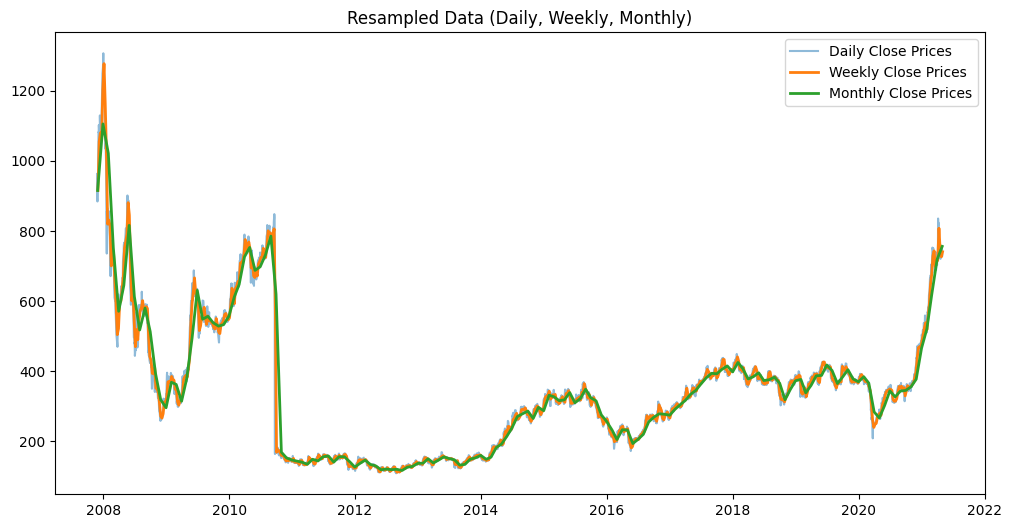

In [ ]:
# Resample to weekly frequency and calculate mean
weekly_data = df['Close'].resample('W').mean()
monthly_data = df['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Daily Close Prices', alpha=0.5)
plt.plot(weekly_data, label='Weekly Close Prices', linewidth=2)
plt.plot(monthly_data, label='Monthly Close Prices', linewidth=2)
plt.title("Resampled Data (Daily, Weekly, Monthly)")
plt.legend()
plt.show()

## Scaling

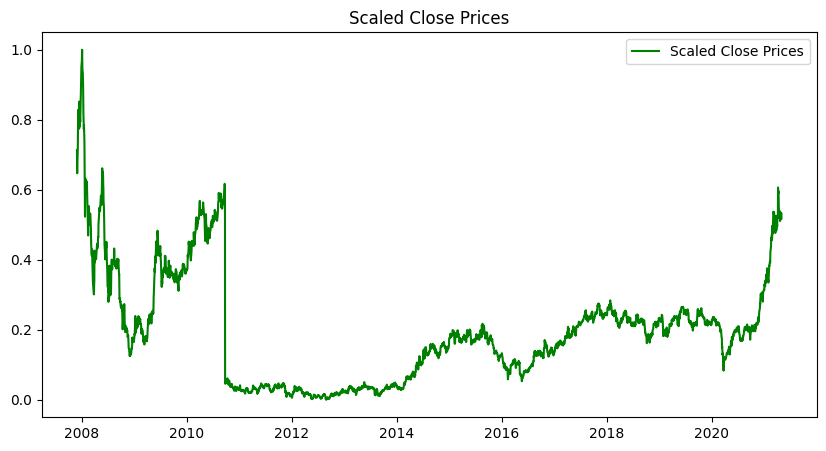

In [ ]:
# Scale the 'Close' column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df[['Close']])

plt.figure(figsize=(10, 5))
plt.plot(df['Close_scaled'], label='Scaled Close Prices', color='green')
plt.title("Scaled Close Prices")
plt.legend()
plt.show()

# Time Series Decomposition

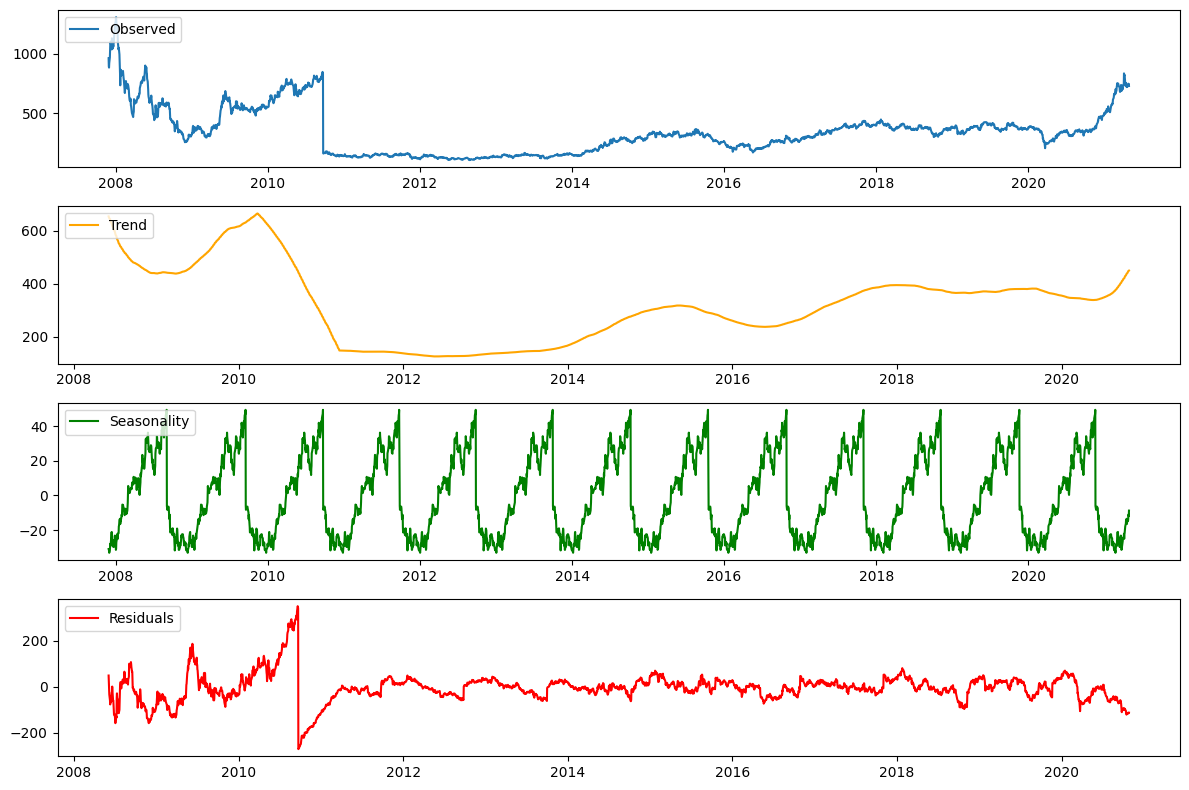

In [ ]:
# Decompose the series into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)  # 252 days

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Model Selection and Implementation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

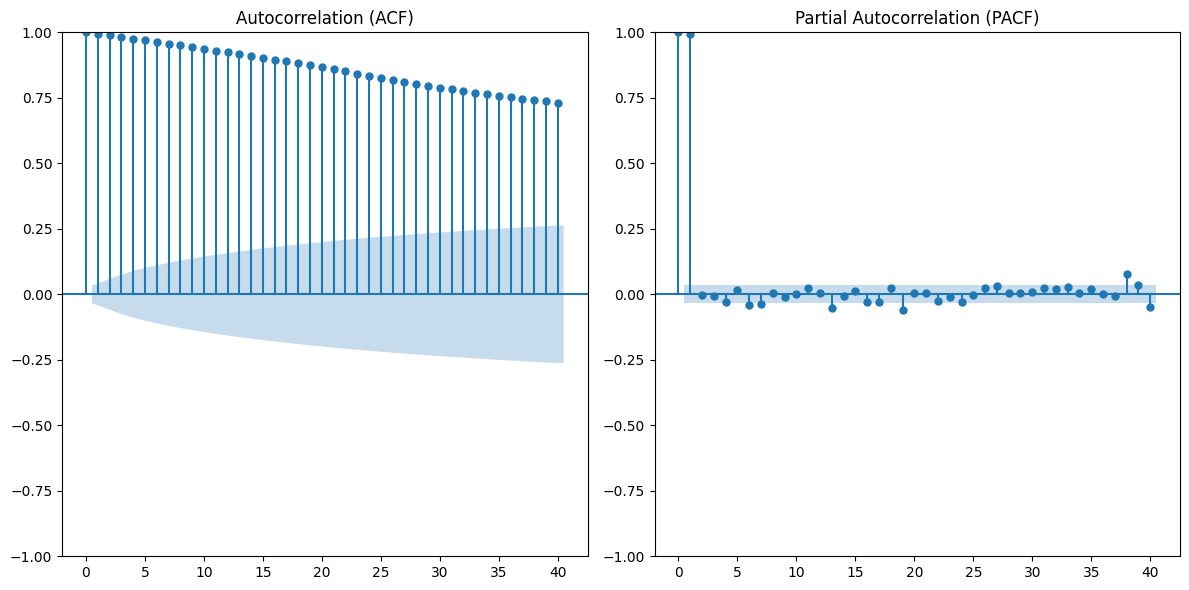

In [ ]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close'].dropna(), ax=plt.gca(), lags=40)
plt.title("Autocorrelation (ACF)")
plt.subplot(122)
plot_pacf(df['Close'].dropna(), ax=plt.gca(), lags=40)
plt.title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3322
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -14046.702
Date:                Sun, 24 Nov 2024   AIC                          28101.404
Time:                        12:39:13   BIC                          28125.837
Sample:                             0   HQIC                         28110.147
                               - 3322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.2750    201.889      1.705      0.088     -51.419     739.969
ar.L1          0.9976      0.002    619.652      0.000       0.994       1.001
ma.L1          0.0406      0.010      4.085      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


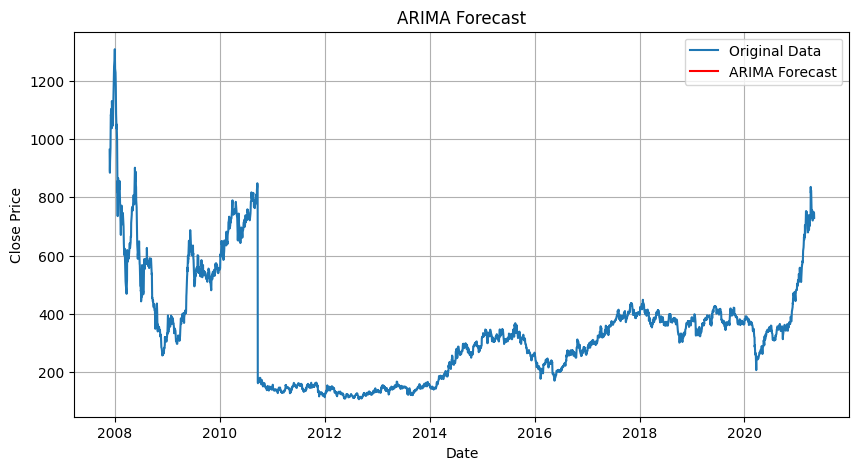

In [ ]:
# Define parameters (p, d, q) based on ACF and PACF plots
p, d, q = 1, 0, 1

# Fit ARIMA
arima_model = ARIMA(df['Close'], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

#Forecast future values
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Create a forecast series with aligned index
forecast_series = pd.Series(forecast, index=forecast_index)

#Plot original data and forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Original Data')
plt.plot(forecast_series, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3322
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -14046.702
Date:                Sun, 24 Nov 2024   AIC                          28101.404
Time:                        12:39:16   BIC                          28125.837
Sample:                             0   HQIC                         28110.147
                               - 3322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.2750    201.889      1.705      0.088     -51.419     739.969
ar.L1          0.9976      0.002    619.652      0.000       0.994       1.001
ma.L1          0.0406      0.010      4.085      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


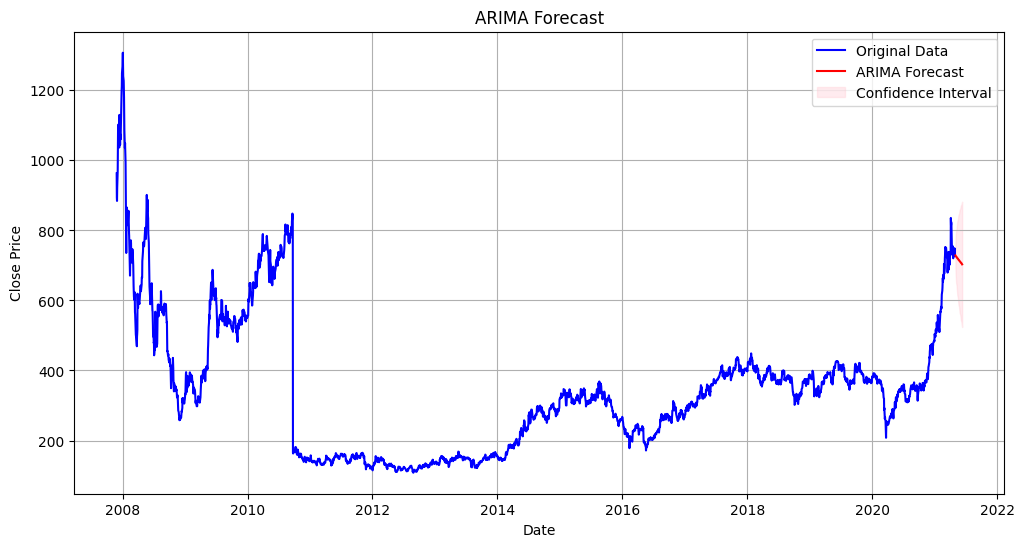

In [ ]:
p, d, q = 1, 0, 1
arima_model = ARIMA(df['Close'], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

#Forecast future values
forecast_steps = 30  # Forecast 30 future periods
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean  # Predicted values
forecast_ci = forecast.conf_int()  # Confidence intervals

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]

#Convert forecast output to a pandas Series
forecast_series = pd.Series(forecast_mean.values, index=forecast_index)
lower_series = pd.Series(forecast_ci.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(forecast_ci.iloc[:, 1].values, index=forecast_index)

#Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data', color='blue')
plt.plot(forecast_series, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, lower_series, upper_series, color='pink', alpha=0.3, label='Confidence Interval')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

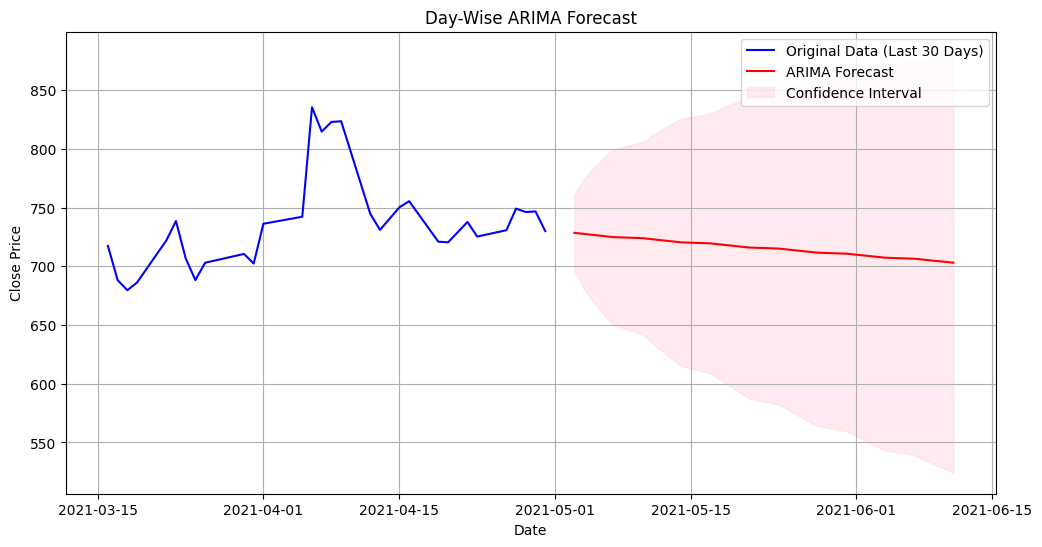

In [ ]:
# Filter data for the zoomed-in plot (last 30 days + forecast)
last_days = 30  # Show the last 30 days of actual data
zoomed_data = df['Close'].iloc[-last_days:]  # Select last 'n' days of actual data

# Plot day-wise view
plt.figure(figsize=(12, 6))
plt.plot(zoomed_data, label='Original Data (Last 30 Days)', color='blue')
plt.plot(forecast_series, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, lower_series, upper_series, color='pink', alpha=0.3, label='Confidence Interval')
plt.title("Day-Wise ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3322
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -14047.895
Date:                            Sun, 24 Nov 2024   AIC                          28105.791
Time:                                    12:39:27   BIC                          28136.333
Sample:                                         0   HQIC                         28116.720
                                           - 3322                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.001   1681.648      0.000       0.998       1.000
ma.L1          0.0412      0.010   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


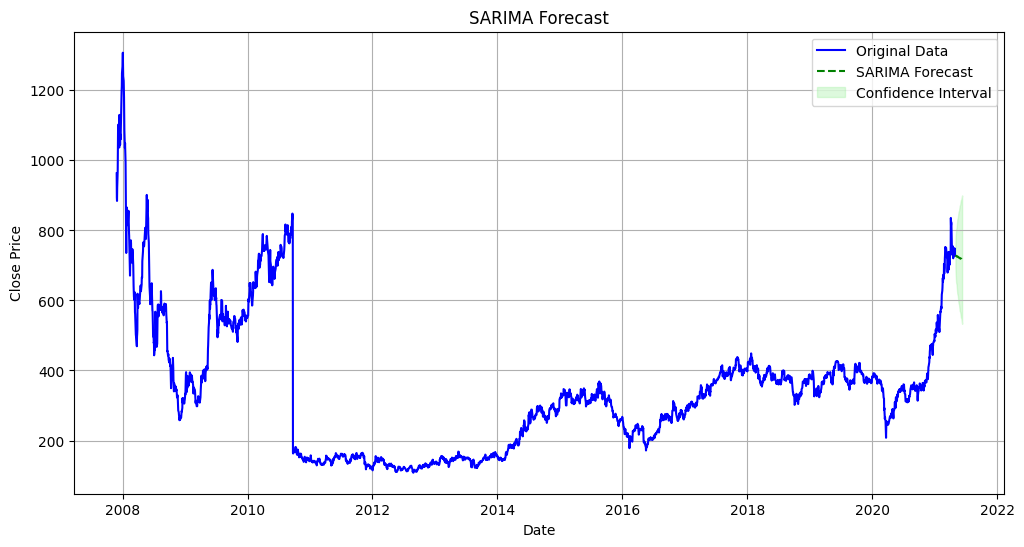

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters (p, d, q)(P, D, Q, s)
p, d, q = 1, 0, 1  # Example non-seasonal order
P, D, Q, s = 1, 0, 1, 12  # Example seasonal order for monthly data

# Fit SARIMA model
sarima_model = SARIMAX(df['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

# Forecast using SARIMA
forecast_steps = 30  # Forecast the next 30 steps
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Convert forecast output to a pandas Series
sarima_forecast_series = pd.Series(sarima_forecast_mean.values, index=forecast_index)

# Extract confidence intervals
lower_series = pd.Series(sarima_forecast_ci.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(sarima_forecast_ci.iloc[:, 1].values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data', color='blue')
plt.plot(sarima_forecast_series, label='SARIMA Forecast', color='green', linestyle='--')
plt.fill_between(forecast_index, lower_series, upper_series, color='lightgreen', alpha=0.3, label='Confidence Interval')
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


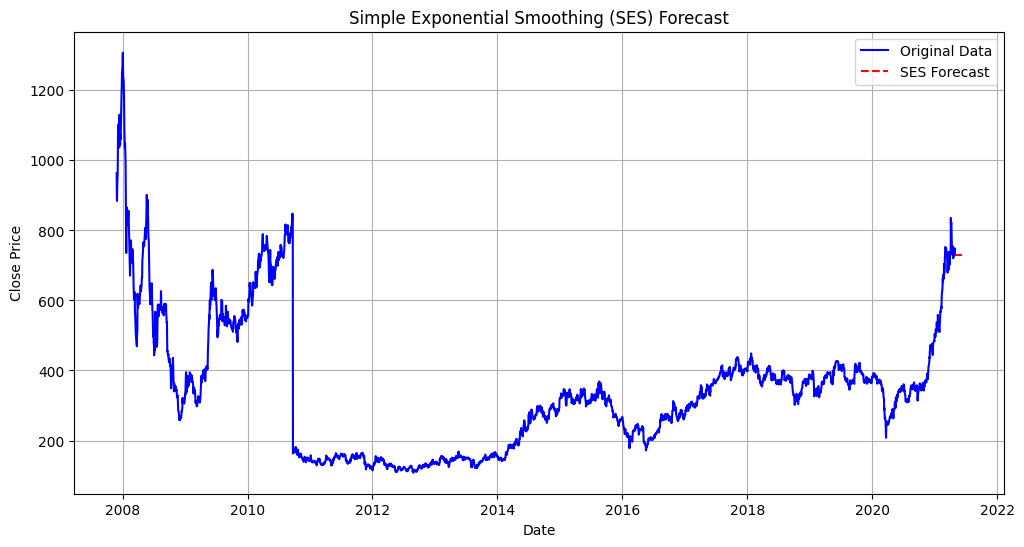

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(df['Close']).fit()
ses_forecast = ses_model.forecast(steps=30)

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=30 + 1, freq='B')[1:]
ses_forecast_series = pd.Series(ses_forecast.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data', color='blue')
plt.plot(ses_forecast_series, label='SES Forecast', color='red', linestyle='--')
plt.title("Simple Exponential Smoothing (SES) Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


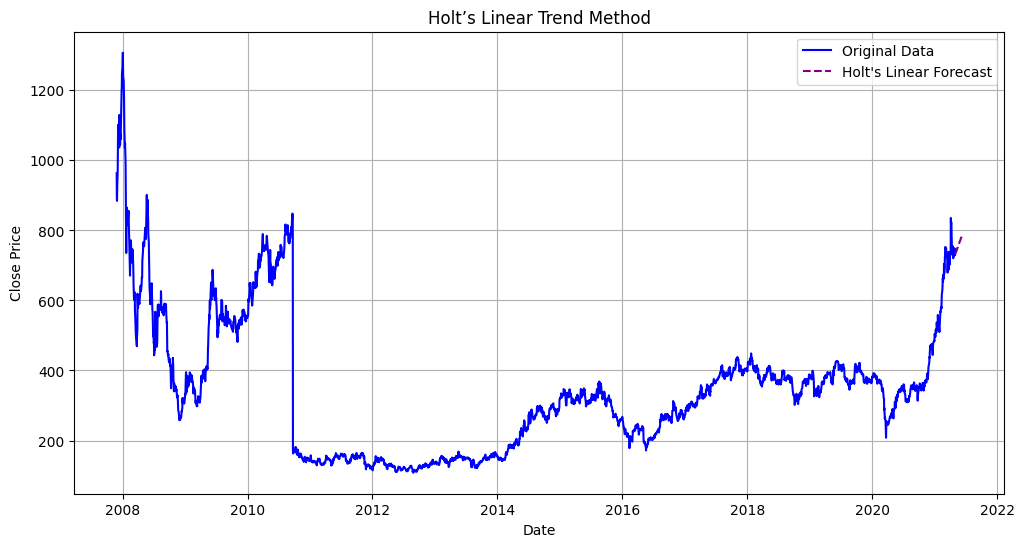

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt’s Linear Trend Method
holt_model = ExponentialSmoothing(df['Close'], trend='add', seasonal=None).fit()
holt_forecast = holt_model.forecast(steps=30)

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=30 + 1, freq='B')[1:]
holt_forecast_series = pd.Series(holt_forecast.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data', color='blue')
plt.plot(holt_forecast_series, label="Holt's Linear Forecast", color='purple', linestyle='--')
plt.title("Holt’s Linear Trend Method")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


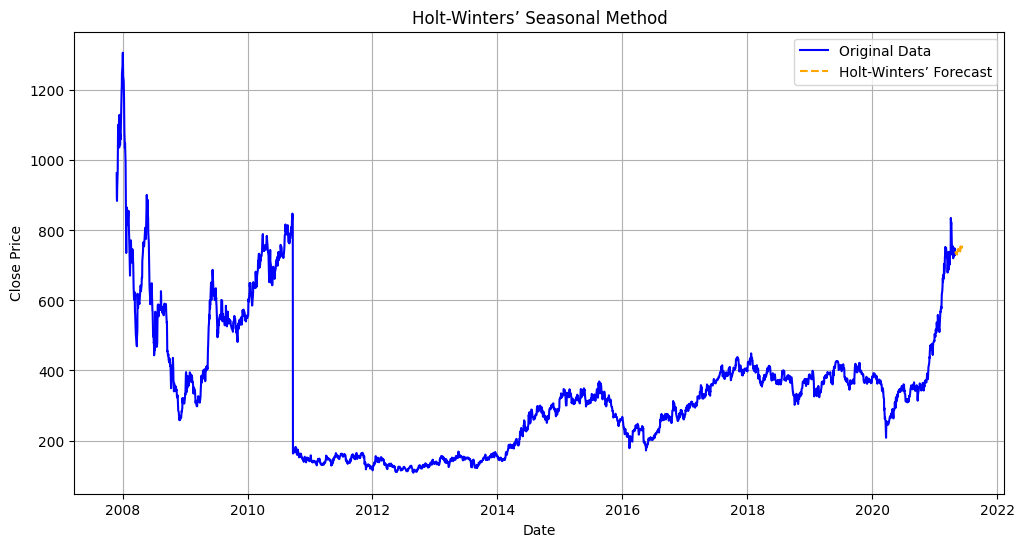

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters’ Seasonal Method
hw_model = ExponentialSmoothing(
    df['Close'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()
hw_forecast = hw_model.forecast(steps=30)

# Create a date range for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=30 + 1, freq='B')[1:]
hw_forecast_series = pd.Series(hw_forecast.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data', color='blue')
plt.plot(hw_forecast_series, label='Holt-Winters’ Forecast', color='orange', linestyle='--')
plt.title("Holt-Winters’ Seasonal Method")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Extract forecasted values from the PredictionResultsWrapper object
forecast_values = forecast.predicted_mean[:30]  # Accessing the predicted mean of the forecast

# Ensure the actual values are properly aligned with the forecast
actual_values = df['Close'][-30:]

# Calculate MSE
mse_arima = mean_squared_error(actual_values, forecast_values)
print(f"ARIMA MSE: {mse_arima}")
rmse_arima = np.sqrt(mse_arima)
print(f"ARIMA RMSE: {rmse_arima}")

ARIMA MSE: 2306.222707388175
ARIMA RMSE: 48.02314762058163


In [ ]:
forecast_values = sarima_forecast.predicted_mean[:30]  # Accessing the predicted mean of the forecast

# Ensure the actual values are properly aligned with the forecast
actual_values = df['Close'][-30:]

# Calculate MSE
mse_sarima = mean_squared_error(actual_values, forecast_values)
print(f"SARIMA MSE: {mse_sarima}")
rmse_sarima = np.sqrt(mse_sarima)
print(f"SARIMA RMSE: {rmse_sarima}")

SARIMA MSE: 1897.4255763243707
SARIMA RMSE: 43.55944876056595


In [ ]:
actual_values = df['Close'][-30:]
forecast_values = ses_forecast

mse_ses = mean_squared_error(actual_values, forecast_values)
print(f"SES MSE: {mse_ses}")
rmse_ses = np.sqrt(mse_ses)
print(f"SES RMSE: {rmse_ses}")

SES MSE: 1632.8561632491362
SES RMSE: 40.408614963261684


In [ ]:
actual_values = df['Close'][-30:]
forecast_values = holt_forecast

mse_holt = mean_squared_error(actual_values, forecast_values)
print(f"holt MSE: {mse_holt}")
rmse_holt = np.sqrt(mse_holt)
print(f"holt RMSE: {rmse_holt}")

holt MSE: 1947.0843247125022
holt RMSE: 44.125778460130334


In [ ]:
actual_values = df['Close'][-30:]
forecast_values = hw_forecast

mse_hw = mean_squared_error(actual_values, forecast_values)
print(f"hw MSE: {mse_hw}")
rmse_hw = np.sqrt(mse_hw)
print(f"HW RMSE: {rmse_hw}")

hw MSE: 1506.551721306917
HW RMSE: 38.81432366159324


In [ ]:
from statsmodels.tsa.api import VAR, VARMAX

In [ ]:
#columns for multivariate analysis
multivariate_data = df[['Close', 'Volume', 'VWAP']].dropna()

# Ensure the index is datetime for time series modeling
multivariate_data.index = pd.to_datetime(multivariate_data.index)

# Split data into train and test sets
train_size = int(len(multivariate_data) * 0.8)
train, test = multivariate_data[:train_size], multivariate_data[train_size:]

In [ ]:
# Fit the VAR model
var_model = VAR(train)
var_result = var_model.fit(maxlags=15, ic='aic')  # Select lag order using AIC
print(var_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, Nov, 2024
Time:                     12:39:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    37.7909
Nobs:                     2645.00    HQIC:                   37.6334
Log likelihood:          -60800.3    FPE:                2.01927e+16
AIC:                      37.5441    Det(Omega_mle):     1.93685e+16
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              1.682818         0.883393            1.905           0.057
L1.Close           1.233141         0.071959           17.137           0.000
L1.Volume         -0.000000         0.000000           -0.174           

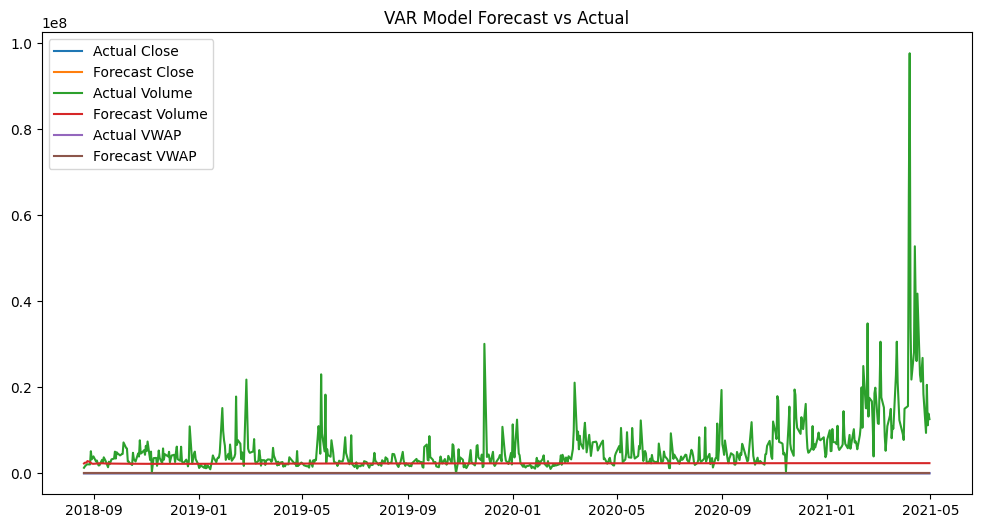

VAR Model MSE: 20107025217345.996


In [ ]:
# Forecast for the test set
lag_order = var_result.k_ar
forecast_input = train.values[-lag_order:]
var_forecast = var_result.forecast(y=forecast_input, steps=len(test))

# Convert forecast to DataFrame
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=train.columns)

# Plot the forecast vs actual
plt.figure(figsize=(12, 6))
for col in train.columns:
    plt.plot(test[col], label=f'Actual {col}')
    plt.plot(var_forecast_df[col], label=f'Forecast {col}')  # Updated line
plt.legend()
plt.title("VAR Model Forecast vs Actual")
plt.show()

# Evaluate performance
mse_var = mean_squared_error(test.values, var_forecast)
print(f"VAR Model MSE: {mse_var}")

In [ ]:
# Fit VARMA model
varma_model = VARMAX(train, order=(2, 1))  # Example order; adjust based on data
varma_result = varma_model.fit(disp=False)
print(varma_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_solvers.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.5229e-18): result may not be accurate.
  x = solve(lhs, q.flatten())


                                Statespace Model Results                               
Dep. Variable:     ['Close', 'Volume', 'VWAP']   No. Observations:                 2657
Model:                              VARMA(2,1)   Log Likelihood              -61411.988
                                   + intercept   AIC                         122895.976
Date:                         Sun, 24 Nov 2024   BIC                         123107.834
Time:                                 12:40:01   HQIC                        122972.653
Sample:                                      0                                         
                                        - 2657                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):       0.05, 1.25, 0.67   Jarque-Bera (JB):   64176352.13, 234885.59, 458502.49
Prob(Q):                  0.83, 0.26, 0.41   Prob(JB):                            0.00, 0.00, 0.00
Heterosked

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


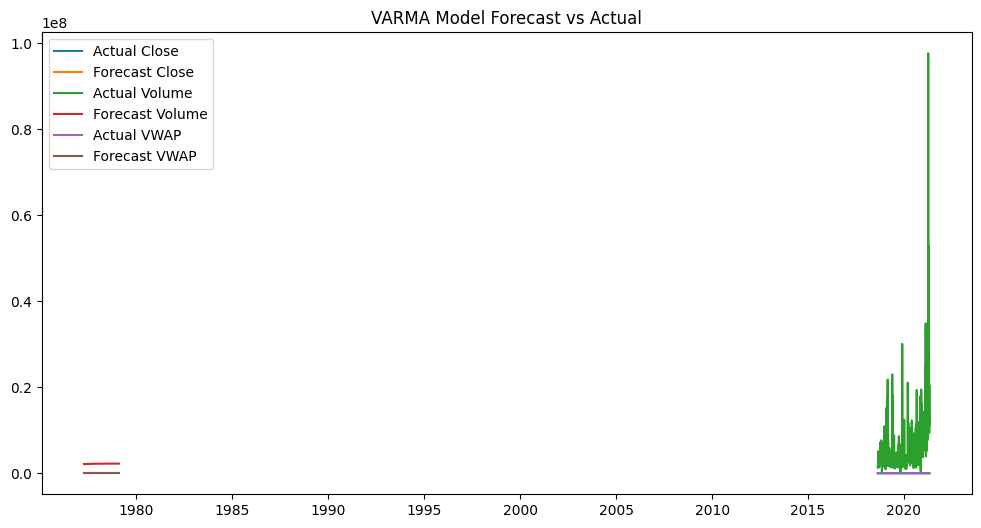

VARMA Model MSE: 20333903893213.69


In [ ]:
# Forecast for the test set
varma_forecast = varma_result.get_forecast(steps=len(test))
varma_forecast_df = varma_forecast.predicted_mean

# Plot the forecast vs actual
plt.figure(figsize=(12, 6))
for col in train.columns:
    plt.plot(test[col], label=f'Actual {col}')
    plt.plot(varma_forecast_df[col], label=f'Forecast {col}')
plt.legend()
plt.title("VARMA Model Forecast vs Actual")
plt.show()

# Evaluate performance
mse_varma = mean_squared_error(test.values, varma_forecast_df.values)
print(f"VARMA Model MSE: {mse_varma}")

In [ ]:
# Example: Use 'VWAP' as an exogenous variable
exog_train = train[['VWAP']]
exog_test = test[['VWAP']]
train_exog = train.drop(columns=['VWAP'])
test_exog = test.drop(columns=['VWAP'])

# Fit VARMAX model with exogenous variable
varmax_model = VARMAX(train_exog, exog=exog_train, order=(2, 1))
varmax_result = varmax_model.fit(disp=False)
print(varmax_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_solvers.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.66291e-17): result may not be accurate.
  x = solve(lhs, q.flatten())


                            Statespace Model Results                           
Dep. Variable:     ['Close', 'Volume']   No. Observations:                 2657
Model:                     VARMAX(2,1)   Log Likelihood              -50263.874
                           + intercept   AIC                         100565.747
Date:                 Sun, 24 Nov 2024   BIC                         100677.561
Time:                         12:40:23   HQIC                        100606.216
Sample:                              0                                         
                                - 2657                                         
Covariance Type:                   opg                                         
Ljung-Box (L1) (Q):             0.58, 1.76   Jarque-Bera (JB):   82632.17, 226386.81
Prob(Q):                        0.44, 0.18   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         0.10, 3.33   Skew:                       -0.75, 4.62
Prob(H) (two-sided):     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q

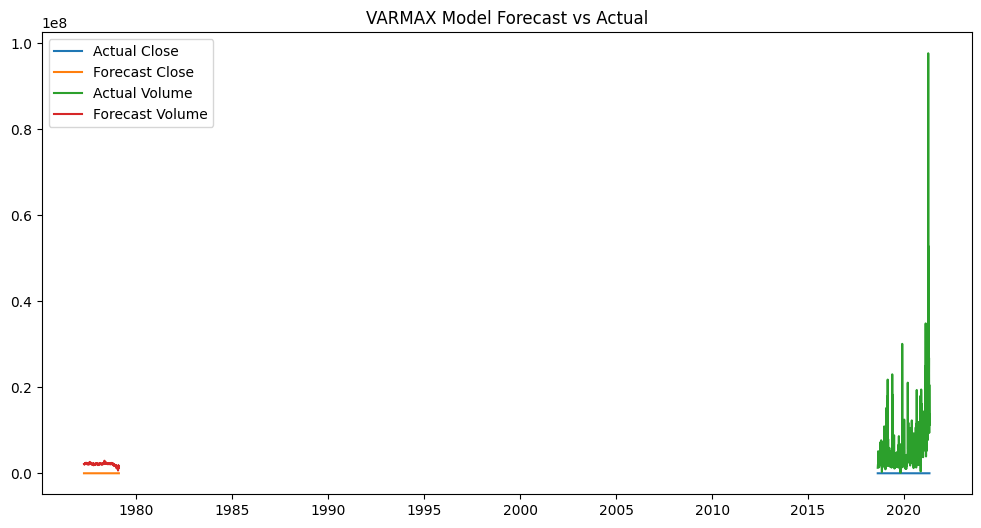

VARMAX Model MSE: 32083119177703.676


In [ ]:
# Forecast for the test set
varmax_forecast = varmax_result.get_forecast(steps=len(test_exog), exog=exog_test)
varmax_forecast_df = varmax_forecast.predicted_mean

# Plot the forecast vs actual
plt.figure(figsize=(12, 6))
for col in train_exog.columns:
    plt.plot(test_exog[col], label=f'Actual {col}')
    plt.plot(varmax_forecast_df[col], label=f'Forecast {col}')
plt.legend()
plt.title("VARMAX Model Forecast vs Actual")
plt.show()

# Evaluate performance
mse_varmax = mean_squared_error(test_exog.values, varmax_forecast_df.values)
print(f"VARMAX Model MSE: {mse_varmax}")

### **Conclusions**

1. **Model Performance Analysis**
   - **ARIMA**: MSE = 2306.22, RMSE = 48.02  
   - **SARIMA**: MSE = 1897.42, RMSE = 43.56  
     - *Conclusion*: SARIMA outperforms ARIMA, capturing seasonality effectively.
   - **Exponential Smoothing Models**:
     - SES: MSE = 1632.86, RMSE = 40.41  
     - Holt's Linear Trend: MSE = 1947.08, RMSE = 44.13  
     - Holt-Winters (HW): MSE = 1506.55, RMSE = 38.81  
     - *Conclusion*: Holt-Winters' Seasonal Model performs best among these models, effectively capturing both trend and seasonality.

2. **Multivariate Models**
   - **VAR**: MSE = \(2.01 \times 10^{13}\)  
   - **VARMA**: MSE = \(2.03 \times 10^{13}\)  
   - **VARMAX**: MSE = \(3.21 \times 10^{13}\)  
     - *Conclusion*: Multivariate models perform poorly, likely due to weak correlations or insufficient feature relevance.

3. **Correlation Matrix of Residuals**
   - **Close and VWAP**: Strong positive correlation (0.96).  
   - **Volume with Close and VWAP**: Weak correlation (~0.05).  
     - *Conclusion*: Volume does not significantly influence Close or VWAP predictions.

4. **Overall Result**
   - **Preferred Model**: Holt-Winters' Seasonal Model (HW) for its ability to capture trend and seasonality.  
   - **Alternative**: SARIMA, for detailed seasonal modeling.  
   - **Multivariate Models**: Not recommended unless better features are engineered or correlations improve.
   - **Insights**: Close and VWAP are strongly correlated, making VWAP a useful complementary variable. Volume is less predictive in this context.
